# Case Study - Visualize Patient Arrivals in Singapore’s Public Hospitals

## Learning Objectives:
1. Manipulate data through filtering
2. Draw basic visualisation to describe the findings   

<i><b>Background</b></i>: Understanding demand is always a key issue in business operations. In healthcare management, patient arrivals are the key to affecting the efficiency of hospital/clinic operations. Without a sufficient number of healthcare professionals to serve patients, the consequence is a long waiting time for patients; thus their lives may be jeopardized. Increasing the number of healthcare professionals, without a doubt, can build a very efficient healthcare system with shorter waiting time, thereby gaining the great satisfaction of patients. However, the corresponding labour cost will become a big burden of the operations. From a managerial point of view, it is important to balance the operation cost and patients’ satisfaction. To achieve this, the first task is being able to know the pattern of patient arrivals as accurate as possible. 
<n>

The `EDdata.csv` contains Singaporeans’ arrivals at some major public hospitals’ emergency departments (EDs) in Oct 2011 and April 2012. Those hospitals are Tan Tock Seng Hospital, 
Singapore General Hospital, National University Hospital, Changi General Hospital, Alexandra Hospital, Khoo Teck Puat Hospital, and KK Women's and Children's Hospital. The data were retrieved from each hospital’s data warehouse system and were a random sample from all the patients who arrived at those hospitals’ EDs during a study period (a whole month). Please import `EDdata.csv` first and check the data.


In [1]:
import pandas as pd

df = pd.read_csv("EDdata.csv")  
df.head(10)

,Case,Hospital_Name,REGIS_DATE,REGIS_TIME,reg_sec,Triage Time,triage_sec,Triage_Class,Age,Gender,Race
0,92408,KTPH,7/4/2012,9:48:33,35313,9:58:12,35892,P2,40.0,M,Chinese
1,54452,KKH,7/10/2011,16:21:05,58865,16:23:42,59022,P2,0.0,M,Chinese
2,28303,CGH,3/10/2011,3:57:45,14265,4:00:00,14400,P3,33.0,M,Indian
3,121169,SGH,16/10/2011,4:08:47,14927,4:10:00,15000,P3,53.0,F,Malay
4,146488,TTSH,24/10/2011,3:09:47,11387,3:14:21,11661,P3,23.0,M,Others
5,93761,KTPH,11/4/2012,0:13:43,823,2:51:08,10268,P3,21.0,M,Chinese
6,95762,KTPH,16/04/2012,23:14:41,83681,1:05:13,3913,P2,47.0,M,Chinese
7,149941,TTSH,2/4/2012,10:12:32,36752,10:15:06,36906,P3,48.0,F,Others
8,23665,AH,29/10/2011,13:43:40,49420,13:49:00,49740,P2,43.0,M,Malay
9,12883,SGH,11/10/2011,6:23:14,22994,6:28:00,23280,P2,44.0,M,Malay


In [2]:
df.shape

(41832, 11)

In [4]:
df.dtypes

Case               int64
Hospital_Name     object
REGIS_DATE        object
REGIS_TIME        object
reg_sec            int64
Triage Time       object
triage_sec         int64
Triage_Class      object
Age              float64
Gender            object
Race              object
dtype: object

## Task 1-1
<i><b>Do male Singaporeans have preferences over different hospitals to attend in case of an emergency? Please also find the pattern for female Singaporeans and draw a visualisation to convey your findings effectively. </b></i> 
<n>

Please remember to delete the patient visits to KKH in the data set. KKH is a Women's and Children's hospital. If an emergency happens, the male patient will not be sent to KKH basically.

- Male Singaporeans

In [21]:
# to filter out the female patients and patients visiting KKH
fil_1= (df['Gender']=='M') & (df['Hospital_Name']!='KKH')
df_male= df.loc[fil_1].copy() #subset data to meet the filtering condition

# to get the unique hospitals in Hospital_Name column
hosp_name = df_male['Hospital_Name'].unique()

out_table = {} # create an empty dictionary 
for hos in hosp_name:
    out_table.update({str(hos):list()})

print(out_table)

{'KTPH': [], 'CGH': [], 'TTSH': [], 'AH': [], 'SGH': [], 'NUH': []}


In [22]:
for hos in hosp_name:
    filter_hos = (df_male['Hospital_Name']==hos)
    out_table[hos] = filter_hos.sum()

result = pd.Series(out_table)
result/result.sum()


KTPH    0.191146
CGH     0.211559
TTSH    0.215002
AH      0.070487
SGH     0.168962
NUH     0.142843
dtype: float64

- Female Singaporeans

In [23]:
# to filter out the male patients and patients visiting KKH
fil_2= (df['Gender']=='F') & (df['Hospital_Name']!='KKH')
df_female= df.loc[fil_2].copy() #subset data to meet the filtering condition

out_table2 = {} # create an empty dictionary 
for hos in hosp_name: # using back the previous hosp_name 
    out_table2.update({str(hos):list()})

print(out_table2)

{'KTPH': [], 'CGH': [], 'TTSH': [], 'AH': [], 'SGH': [], 'NUH': []}


In [24]:
for hos in hosp_name:
    filter_hos = (df_female['Hospital_Name']==hos)
    out_table2[hos] = filter_hos.sum()

result2 = pd.Series(out_table2)
result2/result2.sum()

KTPH    0.155531
CGH     0.203087
TTSH    0.224329
AH      0.049026
SGH     0.223962
NUH     0.144065
dtype: float64

- A bar chart to show the findings

In [25]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")

male_p = result/result.sum()
female_p = result2/result2.sum()
table = pd.DataFrame(data= {'male':male_p, 'female':female_p})

table

,male,female
KTPH,0.191146,0.155531
CGH,0.211559,0.203087
TTSH,0.215002,0.224329
AH,0.070487,0.049026
SGH,0.168962,0.223962
NUH,0.142843,0.144065


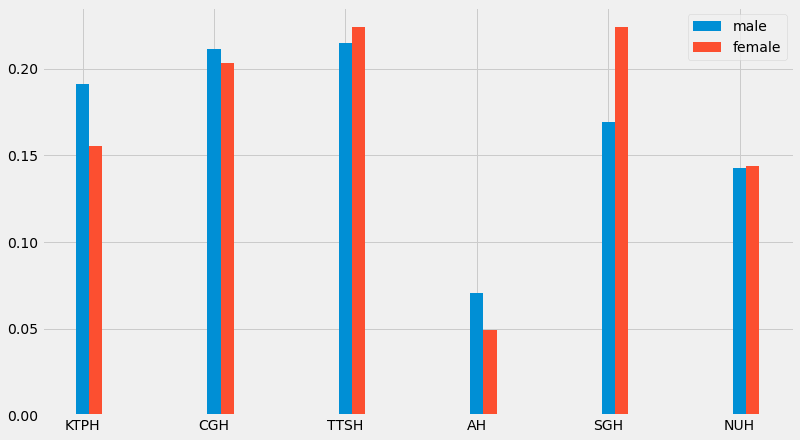

In [28]:
plt.figure(figsize=(12,7))  # set the graph size

x_pos = np.arange(1,7) # six hosp
gender = ['male','female']
plt.bar(x_pos, table.loc[:,'male'], width=0.1, label ='male')
plt.bar(x_pos+1 *0.1, table.loc[:,'female'], width=0.1, label ='female')
plt.legend()
plt.xticks(x_pos, hosp_name)

plt.show()

## Task 1-2
<n>

<i><b>Are the patients’ waiting time distributions similar across different public hospitals? Please draw a line chart to compare the median waiting time across different public hospitals.</b></i>
- To find the waiting time, there are two possible scenarios as follows:
    1. (Case 1) triage time is larger than registration time (normal cases)
    2. (Case 2) the triage will be conducted after midnight. However, the "sec" columns are always computed using `00:00:00` as the origin.

In [35]:
# first, calculate the wait time
df['Wait_time'] = 0
#n_pat = len(df)
df_reg = df['reg_sec']
df_tri = df['triage_sec']
df_wait = df['Wait_time']

df_wait = (24*60*60) - df_reg + df_tri # handle Case 2 first

filt_1 = df['triage_sec']> df['reg_sec'] # handle case 1
df_wait[filt_1] = df_tri[filt_1] - df_reg[filt_1]

df['Wait_time'] = df_wait
df['Wait_min'] = df_wait/60.0

df

,Case,Hospital_Name,REGIS_DATE,REGIS_TIME,reg_sec,Triage Time,triage_sec,Triage_Class,Age,Gender,Race,Wait_time,Wait_min
0,92408,KTPH,7/4/2012,9:48:33,35313,9:58:12,35892,P2,40.0,M,Chinese,579,9.650000
1,54452,KKH,7/10/2011,16:21:05,58865,16:23:42,59022,P2,0.0,M,Chinese,157,2.616667
2,28303,CGH,3/10/2011,3:57:45,14265,4:00:00,14400,P3,33.0,M,Indian,135,2.250000
3,121169,SGH,16/10/2011,4:08:47,14927,4:10:00,15000,P3,53.0,F,Malay,73,1.216667
4,146488,TTSH,24/10/2011,3:09:47,11387,3:14:21,11661,P3,23.0,M,Others,274,4.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41827,38592,CGH,29/10/2011,14:07:15,50835,14:17:00,51420,P2,82.0,F,Chinese,585,9.750000
41828,20523,AH,2/10/2011,7:18:06,26286,7:18:00,26280,P1,88.0,F,Chinese,86394,1439.900000
41829,30317,CGH,8/10/2011,12:59:42,46782,12:59:00,46740,P2,59.0,M,Malay,86358,1439.300000
41830,126705,SGH,31/10/2011,9:55:18,35718,10:06:00,36360,P3,54.0,F,Chinese,642,10.700000


In [36]:
out_dic = {}                               # create a dictionary to store the computation result
hosp_name = df['Hospital_Name'].unique()   # Find out the unique hospitals in the data set
for hos in hosp_name:
    out_dic.update({str(hos): np.zeros(5)}) # we just need 5 summary statistics.
                                            # Thus, we create a 5-element array
print(out_dic)

{'KTPH': array([0., 0., 0., 0., 0.]), 'KKH': array([0., 0., 0., 0., 0.]), 'CGH': array([0., 0., 0., 0., 0.]), 'SGH': array([0., 0., 0., 0., 0.]), 'TTSH': array([0., 0., 0., 0., 0.]), 'AH': array([0., 0., 0., 0., 0.]), 'NUH': array([0., 0., 0., 0., 0.])}


In [40]:
# calculate the 5 statistic (mean, median, 3 percentile)
for hos in hosp_name:
    hos_filter = (df['Hospital_Name']== hos)# create a hospital specific filter
    df_hos = df.loc[hos_filter, 'Wait_min']  # subset the data to include the target hospital only
    out_dic[hos][0] = df_hos.mean()
    out_dic[hos][1] = df_hos.median()
    out_dic[hos][2:] = df_hos.quantile([.25, .75, .99]) # 25th, 75th, 99th percentile
    
resultQ2 = pd.DataFrame(out_dic, index = ['Mean', 'Median', 'Q1', 'Q3', '99%'])
resultQ2               

,KTPH,KKH,CGH,SGH,TTSH,AH,NUH
Mean,34.179762,7.077221,174.935742,99.166505,7.473360,594.082714,42.252752
Median,26.533333,4.166667,12.400000,5.700000,6.083333,11.000000,31.291667
Q1,14.404167,1.233333,5.745833,2.433333,3.566667,4.445833,17.200000
Q3,46.379167,9.816667,25.137500,12.133333,9.625000,1439.400000,53.441667
99%,134.824333,34.700000,1439.666667,1439.933333,28.022333,1439.983333,151.287000


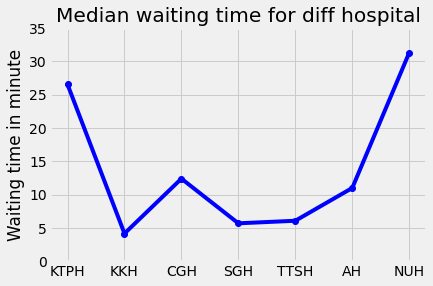

In [42]:
# draw the median waiting time for all the hospitals
x_loc = range(1,8)
y_loc = resultQ2.loc['Median',:]
plt.plot(x_loc,y_loc, marker = 'o', color = 'b', linestyle = 'solid')
plt.xticks(x_loc, resultQ2.columns)

plt.ylim(0,35) # limit the y-scale from 0-35
plt.ylabel('Waiting time in minute')
plt.title("Median waiting time for diff hospital")
plt.show()

**Do you notice any anomaly in the table generated?**

- Please filter the records with waiting time larger than 300 minutes 

In [43]:
filter_check = df["Wait_min"] > 300
df_check = df.loc[filter_check, ["REGIS_TIME", "Triage Time", "reg_sec", "triage_sec", "Wait_time"]]
df_check.head()

,REGIS_TIME,Triage Time,reg_sec,triage_sec,Wait_time
26,21:44:24,21:44:00,78264,78240,86376
42,14:36:06,14:36:00,52566,52560,86394
50,18:42:38,18:41:00,67358,67260,86302
69,9:16:01,9:14:00,33361,33240,86279
75,6:21:20,6:21:00,22880,22860,86380


In practice, it is common to have anomalous data. Moreover, anomalous data values are due mainly to two possible reasons:
1. The way/logic you use to compute values is incorrect. (Logical error!)
2. The data records are not correct. (Data entry error!)

## Task 1-3
<n>

To make a staffing plan, which decides the number of nurses and doctors to serve patients, a deep understanding of patient arrivals is crucial. The staffing plan in practice will be made on an hourly basis (24 intervals) every day. Thus, please create a new column, `REGIS_HOUR`, in df. Moreover, the patients’ arrival pattern may vary by the day of a month. Please also create a new column, `REGIS_DAY`, in df.

In [46]:
date = np.zeros(df.shape[0], dtype = int)
time = np.zeros(df.shape[0], dtype = int)
year = np.zeros(df.shape[0], dtype = int)

In [54]:
for i in range(df.shape[0]):
    dd, *_, yy = df.loc[i,'REGIS_DATE'].split('/')
    hh, *_ = df.loc[i, 'REGIS_TIME'].split(':')
    date[i] = dd
    time[i] = hh
    year[i] = yy

df['REGIS_DAY'] = date
df['REGIS_HOUR'] = time
df['REGIS_YEAR'] = year
df.head(10)

,Case,Hospital_Name,REGIS_DATE,REGIS_TIME,reg_sec,Triage Time,triage_sec,Triage_Class,Age,Gender,Race,Wait_time,Wait_min,REGIS_DAY,REGIS_HOUR,REGIS_YEAR
0,92408,KTPH,7/4/2012,9:48:33,35313,9:58:12,35892,P2,40.0,M,Chinese,579,9.650000,7,9,2012
1,54452,KKH,7/10/2011,16:21:05,58865,16:23:42,59022,P2,0.0,M,Chinese,157,2.616667,7,16,2011
2,28303,CGH,3/10/2011,3:57:45,14265,4:00:00,14400,P3,33.0,M,Indian,135,2.250000,3,3,2011
3,121169,SGH,16/10/2011,4:08:47,14927,4:10:00,15000,P3,53.0,F,Malay,73,1.216667,16,4,2011
4,146488,TTSH,24/10/2011,3:09:47,11387,3:14:21,11661,P3,23.0,M,Others,274,4.566667,24,3,2011
5,93761,KTPH,11/4/2012,0:13:43,823,2:51:08,10268,P3,21.0,M,Chinese,9445,157.416667,11,0,2012
6,95762,KTPH,16/04/2012,23:14:41,83681,1:05:13,3913,P2,47.0,M,Chinese,6632,110.533333,16,23,2012
7,149941,TTSH,2/4/2012,10:12:32,36752,10:15:06,36906,P3,48.0,F,Others,154,2.566667,2,10,2012
8,23665,AH,29/10/2011,13:43:40,49420,13:49:00,49740,P2,43.0,M,Malay,320,5.333333,29,13,2011
9,12883,SGH,11/10/2011,6:23:14,22994,6:28:00,23280,P2,44.0,M,Malay,286,4.766667,11,6,2011


## Task 1-4: Understand the hourly trend of patient arrivals in Singapore's public hospitals.
<n>

First, find out the average number of patient arrivals in each hour of a day. Then, please show the hourly trend of patient arrivals in Singapore's public hospitals.
    
To answer this question, we assume the arrival pattern is similar across different days. 

In [56]:
filt_year = (df['REGIS_YEAR']==2011)
df_2011 = df.loc[filt_year].copy()
df_2011.head(10)

,Case,Hospital_Name,REGIS_DATE,REGIS_TIME,reg_sec,Triage Time,triage_sec,Triage_Class,Age,Gender,Race,Wait_time,Wait_min,REGIS_DAY,REGIS_HOUR,REGIS_YEAR
1,54452,KKH,7/10/2011,16:21:05,58865,16:23:42,59022,P2,0.0,M,Chinese,157,2.616667,7,16,2011
2,28303,CGH,3/10/2011,3:57:45,14265,4:00:00,14400,P3,33.0,M,Indian,135,2.250000,3,3,2011
3,121169,SGH,16/10/2011,4:08:47,14927,4:10:00,15000,P3,53.0,F,Malay,73,1.216667,16,4,2011
4,146488,TTSH,24/10/2011,3:09:47,11387,3:14:21,11661,P3,23.0,M,Others,274,4.566667,24,3,2011
8,23665,AH,29/10/2011,13:43:40,49420,13:49:00,49740,P2,43.0,M,Malay,320,5.333333,29,13,2011
9,12883,SGH,11/10/2011,6:23:14,22994,6:28:00,23280,P2,44.0,M,Malay,286,4.766667,11,6,2011
12,139438,TTSH,4/10/2011,13:53:40,50020,13:57:40,50260,P3,35.0,M,Others,240,4.000000,4,13,2011
13,106013,NUH,23/10/2011,9:30:31,34231,10:02:00,36120,P2,63.0,M,Chinese,1889,31.483333,23,9,2011
14,116940,SGH,3/10/2011,16:25:38,59138,16:33:00,59580,P3,78.0,M,Chinese,442,7.366667,3,16,2011
16,58838,KKH,16/10/2011,15:05:46,54346,15:17:50,55070,P2,4.0,F,Chinese,724,12.066667,16,15,2011


In [58]:
df_2011.info()  # show the numbers of rows and columns and all columns' data types at the same time  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21146 entries, 1 to 41830
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Case           21146 non-null  int64  
 1   Hospital_Name  21146 non-null  object 
 2   REGIS_DATE     21146 non-null  object 
 3   REGIS_TIME     21146 non-null  object 
 4   reg_sec        21146 non-null  int64  
 5   Triage Time    21146 non-null  object 
 6   triage_sec     21146 non-null  int64  
 7   Triage_Class   21146 non-null  object 
 8   Age            21144 non-null  float64
 9   Gender         21146 non-null  object 
 10  Race           21146 non-null  object 
 11  Wait_time      21146 non-null  int64  
 12  Wait_min       21146 non-null  float64
 13  REGIS_DAY      21146 non-null  int32  
 14  REGIS_HOUR     21146 non-null  int32  
 15  REGIS_YEAR     21146 non-null  int32  
dtypes: float64(2), int32(3), int64(4), object(7)
memory usage: 2.5+ MB


In [61]:
filt = (df_2011.REGIS_DAY == 2) & (df_2011.REGIS_HOUR == 1)
filt.sum()

24

In [62]:
table_31by24 = np.zeros((31,24), dtype = float)

for i in range(31):
    for j in range(24):
        filt = (df_2011.REGIS_DAY == (i+1)) & (df_2011.REGIS_HOUR ==j)
        table_31by24[i,j] = filt.sum()

pd.DataFrame(table_31by24)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,19.0,20.0,14.0,9.0,11.0,7.0,10.0,13.0,27.0,25.0,...,31.0,43.0,38.0,28.0,17.0,32.0,44.0,45.0,28.0,30.0
1,27.0,24.0,11.0,17.0,11.0,14.0,8.0,15.0,23.0,28.0,...,49.0,38.0,40.0,40.0,26.0,44.0,33.0,53.0,37.0,32.0
2,24.0,14.0,17.0,13.0,10.0,10.0,14.0,22.0,30.0,34.0,...,51.0,37.0,46.0,37.0,28.0,34.0,42.0,37.0,33.0,22.0
3,12.0,15.0,4.0,6.0,5.0,11.0,11.0,13.0,17.0,33.0,...,41.0,37.0,33.0,27.0,31.0,39.0,36.0,52.0,32.0,32.0
4,19.0,16.0,14.0,2.0,2.0,6.0,9.0,15.0,25.0,36.0,...,32.0,31.0,37.0,30.0,29.0,28.0,35.0,38.0,32.0,36.0
5,24.0,13.0,5.0,14.0,11.0,4.0,12.0,16.0,24.0,25.0,...,37.0,28.0,36.0,40.0,26.0,21.0,39.0,42.0,36.0,30.0
6,17.0,13.0,7.0,4.0,13.0,7.0,8.0,12.0,21.0,33.0,...,45.0,31.0,43.0,19.0,40.0,19.0,39.0,32.0,26.0,27.0
7,26.0,13.0,10.0,15.0,9.0,5.0,12.0,13.0,24.0,35.0,...,44.0,30.0,34.0,34.0,30.0,37.0,32.0,38.0,38.0,34.0
8,19.0,11.0,12.0,13.0,11.0,7.0,7.0,10.0,21.0,40.0,...,48.0,56.0,35.0,30.0,21.0,39.0,50.0,32.0,40.0,27.0
9,21.0,17.0,13.0,11.0,13.0,13.0,14.0,22.0,32.0,38.0,...,43.0,44.0,38.0,35.0,23.0,34.0,54.0,38.0,38.0,29.0


In [63]:
df_table_31by24 = pd.DataFrame(table_31by24)
table_24 = df_table_31by24.mean()
table_24

0     21.032258
1     15.290323
2     13.032258
3     11.129032
4      9.322581
5      9.161290
6     10.903226
7     16.354839
8     24.645161
9     35.709677
10    44.032258
11    45.612903
12    39.064516
13    39.516129
14    40.419355
15    36.000000
16    37.290323
17    30.612903
18    30.064516
19    34.645161
20    40.903226
21    37.935484
22    32.064516
23    27.387097
dtype: float64

Draw a line chart to show the hourly trend of patient arrivals in Singapore's public hospitals. What is the conclusion you can draw from your chart?

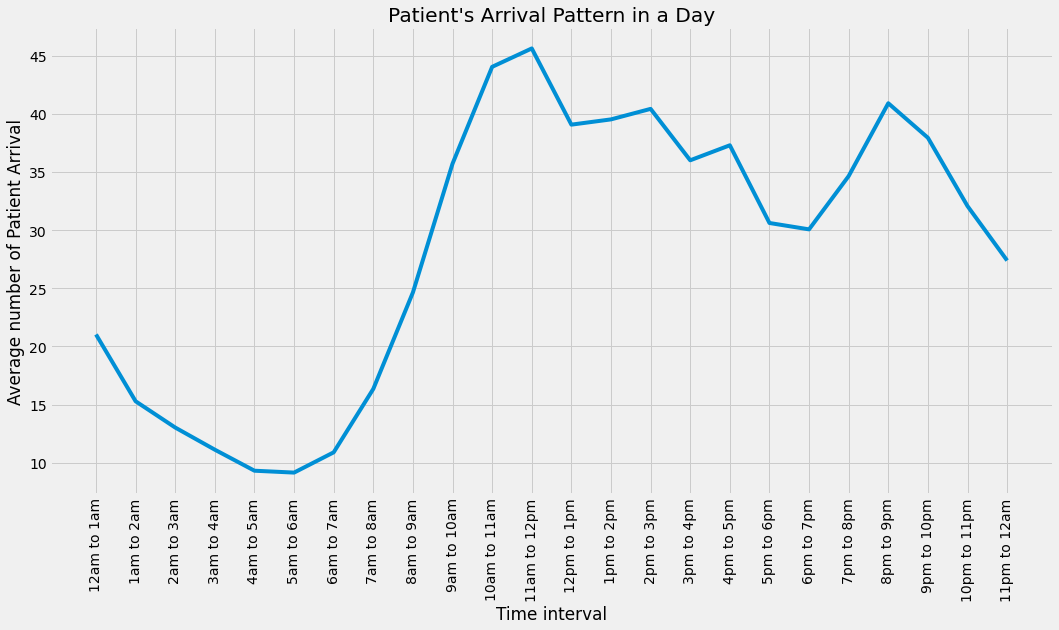

In [65]:
time_labels = ['12am to 1am',
          '1am to 2am', 
          '2am to 3am', 
          '3am to 4am', 
          '4am to 5am',
          '5am to 6am',
          '6am to 7am',
          '7am to 8am',
          '8am to 9am',
          '9am to 10am',
          '10am to 11am',
          '11am to 12pm',
          '12pm to 1pm',
          '1pm to 2pm',
          '2pm to 3pm',
          '3pm to 4pm',
          '4pm to 5pm',
          '5pm to 6pm',
          '6pm to 7pm',
          '7pm to 8pm',
          '8pm to 9pm',
          '9pm to 10pm',
          '10pm to 11pm',
          '11pm to 12am']

plt.figure(figsize = (16,8))
x_pos = np.arange(24)
plt.plot(x_pos,table_24)

plt.xticks(x_pos,time_labels, rotation=90)
plt.ylabel("Average number of Patient Arrival")
plt.xlabel('Time interval')
plt.title("Patient's Arrival Pattern in a Day")
plt.show()

## Task 1-5
<n>

    The assumption that the arrival pattern is similar across different days is too strong to be true. Let's discuss the weekday effect (including Saturday and Sunday) on the arrival pattern of patients. Please create a `WEEKDAY` column in df. For example, if a patient's arrival occurred on 01/10/2011, the corresponding value in `WEEKDAY` column is Saturday.

In [66]:
weekday_check = (df_2011.REGIS_DAY + 5) % 7
weekday_check

1        5
2        1
3        0
4        1
8        6
        ..
41826    0
41827    6
41828    0
41829    6
41830    1
Name: REGIS_DAY, Length: 21146, dtype: int32

In [68]:
df_2011['weekday_check'] = weekday_check
df_2011.head()

,Case,Hospital_Name,REGIS_DATE,REGIS_TIME,reg_sec,Triage Time,triage_sec,Triage_Class,Age,Gender,Race,Wait_time,Wait_min,REGIS_DAY,REGIS_HOUR,REGIS_YEAR,weekday_check
1,54452,KKH,7/10/2011,16:21:05,58865,16:23:42,59022,P2,0.0,M,Chinese,157,2.616667,7,16,2011,5
2,28303,CGH,3/10/2011,3:57:45,14265,4:00:00,14400,P3,33.0,M,Indian,135,2.250000,3,3,2011,1
3,121169,SGH,16/10/2011,4:08:47,14927,4:10:00,15000,P3,53.0,F,Malay,73,1.216667,16,4,2011,0
4,146488,TTSH,24/10/2011,3:09:47,11387,3:14:21,11661,P3,23.0,M,Others,274,4.566667,24,3,2011,1
8,23665,AH,29/10/2011,13:43:40,49420,13:49:00,49740,P2,43.0,M,Malay,320,5.333333,29,13,2011,6


In [69]:
# create a dictionary
weekday = {0: 'Sunday',
           1: 'Monday',
           2: 'Tuesday',
           3: 'Wednesday',
           4: 'Thursday',
           5: 'Friday',
           6: 'Saturday'}

df_2011['Weekday'] = df_2011.weekday_check.map(weekday)
df_2011.head()

,Case,Hospital_Name,REGIS_DATE,REGIS_TIME,reg_sec,Triage Time,triage_sec,Triage_Class,Age,Gender,Race,Wait_time,Wait_min,REGIS_DAY,REGIS_HOUR,REGIS_YEAR,weekday_check,Weekday
1,54452,KKH,7/10/2011,16:21:05,58865,16:23:42,59022,P2,0.0,M,Chinese,157,2.616667,7,16,2011,5,Friday
2,28303,CGH,3/10/2011,3:57:45,14265,4:00:00,14400,P3,33.0,M,Indian,135,2.250000,3,3,2011,1,Monday
3,121169,SGH,16/10/2011,4:08:47,14927,4:10:00,15000,P3,53.0,F,Malay,73,1.216667,16,4,2011,0,Sunday
4,146488,TTSH,24/10/2011,3:09:47,11387,3:14:21,11661,P3,23.0,M,Others,274,4.566667,24,3,2011,1,Monday
8,23665,AH,29/10/2011,13:43:40,49420,13:49:00,49740,P2,43.0,M,Malay,320,5.333333,29,13,2011,6,Saturday


## Task 1-6
<n>
    
With the `WEEKDAY` column, please find out the average number of patient arrivals in each hour by weekday categories. Your answer should be a 7-by-24 table. 

In [80]:
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
table_7by24 = np.zeros((7,24), dtype= float)

for i in range (7):
    for j in range (24):
        filt = (df_2011.Weekday == day_list[i]) & (df_2011.REGIS_HOUR==j)
        table_7by24[i,j] = filt.sum()

In [81]:
table_7by24 = pd.DataFrame(table_7by24)
table_7by24

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,122.0,73.0,74.0,62.0,50.0,54.0,67.0,109.0,147.0,218.0,...,235.0,190.0,218.0,166.0,159.0,189.0,229.0,184.0,176.0,130.0
1,80.0,57.0,48.0,35.0,35.0,31.0,51.0,59.0,97.0,140.0,...,141.0,139.0,135.0,112.0,112.0,140.0,149.0,152.0,121.0,116.0
2,74.0,65.0,48.0,40.0,25.0,33.0,42.0,68.0,105.0,152.0,...,143.0,139.0,159.0,117.0,131.0,133.0,158.0,144.0,127.0,106.0
3,87.0,47.0,49.0,48.0,36.0,40.0,48.0,66.0,104.0,150.0,...,142.0,127.0,145.0,129.0,116.0,125.0,158.0,133.0,117.0,102.0
4,79.0,52.0,49.0,30.0,36.0,26.0,36.0,67.0,99.0,141.0,...,161.0,144.0,164.0,96.0,121.0,115.0,163.0,136.0,116.0,100.0
5,99.0,86.0,66.0,55.0,47.0,38.0,50.0,63.0,105.0,147.0,...,195.0,172.0,160.0,154.0,141.0,173.0,188.0,194.0,158.0,136.0
6,111.0,94.0,70.0,75.0,60.0,62.0,44.0,75.0,107.0,159.0,...,236.0,205.0,175.0,175.0,152.0,199.0,223.0,233.0,179.0,159.0


In [82]:
# get the average of each day
# there are 5 sundays, 5 saturdays and 5 mondays on October 2011
table_7by24.iloc[0] = table_7by24.iloc[0]/5
table_7by24.iloc[1] = table_7by24.iloc[1]/5
table_7by24.iloc[2] = table_7by24.iloc[2]/4
table_7by24.iloc[3] = table_7by24.iloc[3]/4
table_7by24.iloc[4] = table_7by24.iloc[4]/4
table_7by24.iloc[5] = table_7by24.iloc[5]/4
table_7by24.iloc[6] = table_7by24.iloc[6]/5

In [83]:
table_7by24

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,24.40,14.60,14.80,12.40,10.00,10.80,13.4,21.80,29.40,43.60,...,47.00,38.00,43.60,33.20,31.80,37.80,45.80,36.80,35.20,26.0
1,16.00,11.40,9.60,7.00,7.00,6.20,10.2,11.80,19.40,28.00,...,28.20,27.80,27.00,22.40,22.40,28.00,29.80,30.40,24.20,23.2
2,18.50,16.25,12.00,10.00,6.25,8.25,10.5,17.00,26.25,38.00,...,35.75,34.75,39.75,29.25,32.75,33.25,39.50,36.00,31.75,26.5
3,21.75,11.75,12.25,12.00,9.00,10.00,12.0,16.50,26.00,37.50,...,35.50,31.75,36.25,32.25,29.00,31.25,39.50,33.25,29.25,25.5
4,19.75,13.00,12.25,7.50,9.00,6.50,9.0,16.75,24.75,35.25,...,40.25,36.00,41.00,24.00,30.25,28.75,40.75,34.00,29.00,25.0
5,24.75,21.50,16.50,13.75,11.75,9.50,12.5,15.75,26.25,36.75,...,48.75,43.00,40.00,38.50,35.25,43.25,47.00,48.50,39.50,34.0
6,22.20,18.80,14.00,15.00,12.00,12.40,8.8,15.00,21.40,31.80,...,47.20,41.00,35.00,35.00,30.40,39.80,44.60,46.60,35.80,31.8


## Task 1-7
<n>

Using the result of Task 1-6, draw a chart to show the hourly trend of patient arrivals in Singapore's public hospitals by different weekdays. What is the conclusion you can draw from your chart?

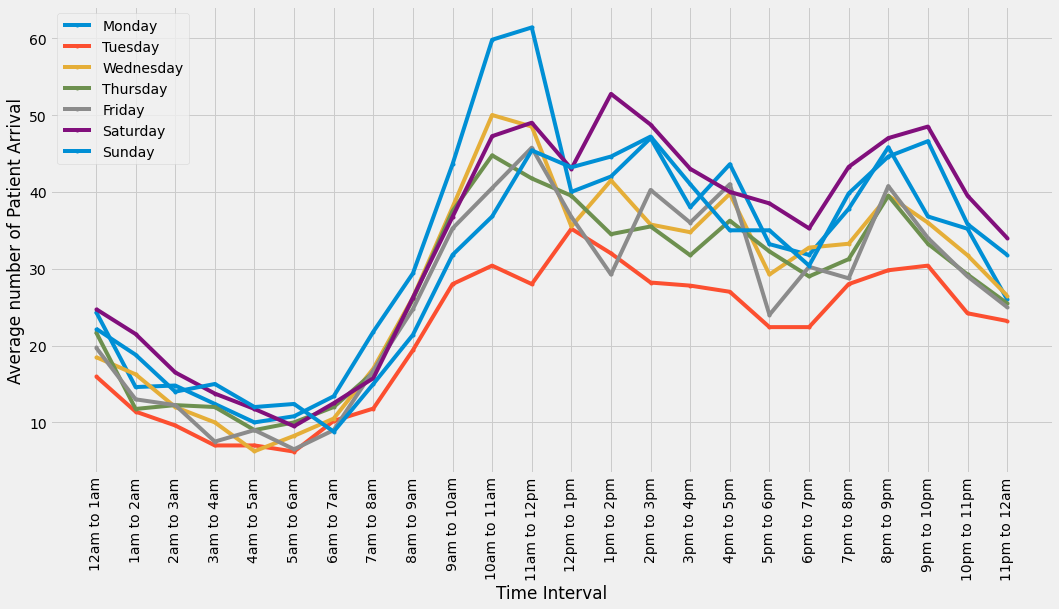

In [88]:
time_labels = ['12am to 1am',
          '1am to 2am', 
          '2am to 3am', 
          '3am to 4am', 
          '4am to 5am',
          '5am to 6am',
          '6am to 7am',
          '7am to 8am',
          '8am to 9am',
          '9am to 10am',
          '10am to 11am',
          '11am to 12pm',
          '12pm to 1pm',
          '1pm to 2pm',
          '2pm to 3pm',
          '3pm to 4pm',
          '4pm to 5pm',
          '5pm to 6pm',
          '6pm to 7pm',
          '7pm to 8pm',
          '8pm to 9pm',
          '9pm to 10pm',
          '10pm to 11pm',
          '11pm to 12am']

plt.figure(figsize = (16,8))
for i in range(7):
    avg_hour_day = table_7by24.iloc[i]
    plt.plot(range(24), avg_hour_day, marker = '.', label= day_list[i])
    plt.legend(loc= 'best')
    plt.xticks(range(24),time_labels, rotation = 90)
    plt.ylabel("Average number of Patient Arrival")
    plt.xlabel('Time Interval')
